# 4. Übung Nichtlineare Regelungstechnik 1, Aufgabe 4

## Nachweis der Instabiliät einer Ruhelage mit Hilfe des Satzes von Chetaev

System:

\begin{align*}
\dot x_1 &= x_1^3 + x_2\\
\dot x_2 &= x_1 + x_2^3
\end{align*}

mit $(x_1,x_2) \in \mathbb{R}$

In diesem Notebook wird illustriert, wie der Satz von Chetaev korrek angewendet wird.

## Satz von Chetaev

Sei $x_e=0$ eine Ruhelage des Systems $\dot x = f(x)$ und $V:D\rightarrow\mathbb{R}$ mit $D \subset \mathbb{R}^n$ und
\begin{align*}
&V(x_e)=0\\
&V(x_0) > 0 \quad \text{für einige} \quad x_0 \quad \text{mit} \quad \| x_0\| \quad \text{beliebig klein.}
\end{align*}
Es lasse sich eine Menge $B_r=\{x\in D | \|x\| \leq r\}$ definieren und für die Menge $U$ gelte:
$U = \{x\in B_r | V(x) > 0\}$. Wenn auf $U$ auch gilt: $\dot V(x) > 0$, dann ist die Ruhelage $x_e=0$ instabil.
In diesem Fall nennt man $V$ auch *Chetaev-Funktion*.

Wichtig ist, dass die Menge $B_r$ kreis-/kugelförmig ist, die Menge $U$ jedoch nicht notwendigerweise.

---

Die aktuelle Fassung dieses Notebooks findet sich in folgendem Repositorium:

https://gitlab.hrz.tu-chemnitz.de/rst/public/teaching/nl1-nbviewer-content

Sie können zur Entwicklung/ Verbesserung über Merge Requests beitragen!

---

<p style="font-family:Courier New; font-size:10pt">
Copyright (c) 2022-2023 Jan Winkler, TU Dresden, Germany
</p>

<p style="font-family:Courier New; font-size:10pt">
This program is free software: you can redistribute it and/or modify<br>
it under the terms of the GNU General Public License as published by<br>
the Free Software Foundation, either version 3 of the License, or<br>
(at your option) any later version.
</p>
    
<p style="font-family:Courier New; font-size:10pt">
This program is distributed in the hope that it will be useful,<br>
but WITHOUT ANY WARRANTY; without even the implied warranty of<br>
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the<br>
GNU General Public License for more details: <br>
<a href=https://www.gnu.org/licenses/gpl-3.0.txt>https://www.gnu.org/licenses/gpl-3.0.txt</a>.
</p>

---

Import benötigter Module

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Definition eines Gitters zur Funktionsauswertung in der $x_1$-$x_2$-Ebene

In [2]:
x1 = np.linspace(-2, 2, 100)
x2 = np.linspace(-2, 2, 100)
xx1, xx2 = np.meshgrid(x1, x2)

## Beispiel 1

Funktion $V_1(x_1, x_2) = \frac{1}{2}x_1^2 + \frac{1}{2}x_2^2$

Die Ableitung lautet: $\dot V_1(x_1, x_2) = x_1^4 + 2 x_1 x_2 + x_2^4$

In [3]:
V1 = 0.5 * xx1**2 + 0.5 * xx2**2
V1Dot = xx1**4 + 2 * xx1 * xx2 + xx2**4

### Grafische Auswertung

Text(0, 0.5, '$x_2$')

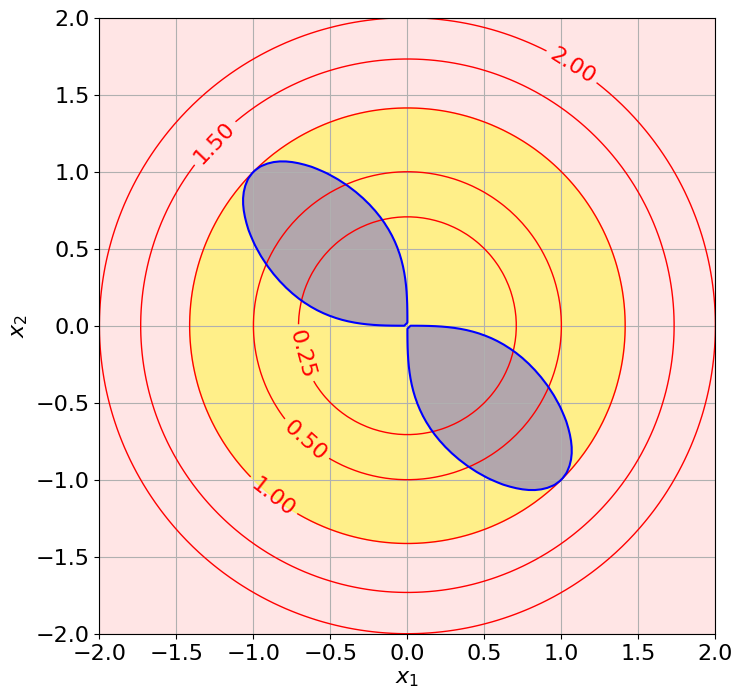

In [4]:
#%matplotlib widget
plt.rcParams["font.size"] = 16

plt.figure(figsize=(8, 8))

# Niveaulinien von V1 mit Labels
cntr = plt.contour(xx1, xx2, V1, levels=[0.25, 0.5, 1.0, 1.5, 2], colors="red", linewidths=1)
plt.gca().clabel(cntr, inline="True")
plt.contourf(xx1, xx2, V1, levels=[0, 10], colors="red", alpha=0.1)

# Kreis für B_r
plt.gca().add_artist(plt.Circle((0, 0), np.sqrt(2), color="yellow", alpha=0.4))

# Bereich, in dem \dot V1 < 0$
plt.contourf(xx1, xx2, V1Dot, levels=[-1, 0], colors="blue", alpha=0.3)
plt.contour(xx1, xx2, V1Dot, levels=[-1, 0], colors="blue")

# Hübsch machen
plt.gca().set_aspect(1)
plt.grid()
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

- Die Niveaulinien von $V_1$ sind rot gekennzeichnet. Die Niveaus sind alle positiv.
- Der Bereich, in dem $V_1$ positiv ist, ist rot hinterlegt (das ist die gesamte Ebene)
- Es lässt sich beispielsweise ein Kreis mit dem Radius $\sqrt{2}$ definieren (gelb hinterlegt), dies ist die Menge $B_r$.
- In diesem Kreis ist $V$ positiv. Also ist $U = B_r$.
- Dummerweise ist der Ausdruck $\dot V$ in dieser Menge $U$ in dem blau markierten Bereich negativ.
- Also kann der Satz von Chetaev nicht angewendet werden, denn $\dot V$ müsste auf ganz $U$ positiv sein.

## Beispiel 2

Funktion $V_2(x_1, x_2) = \frac{1}{2}x_1^2 - \frac{1}{2}x_2^2$

Ableitung: $\dot V_2(x_1, x_2) = x_1^4 - x_2^4$

In [5]:
V2 = 0.5 * xx1**2 - 0.5 * xx2**2
V2Dot = xx1**4 - xx2**4

### Grafische Auswertung

Text(0.5, 1.0, '$\\dot V_2(x_1, x_2)$')

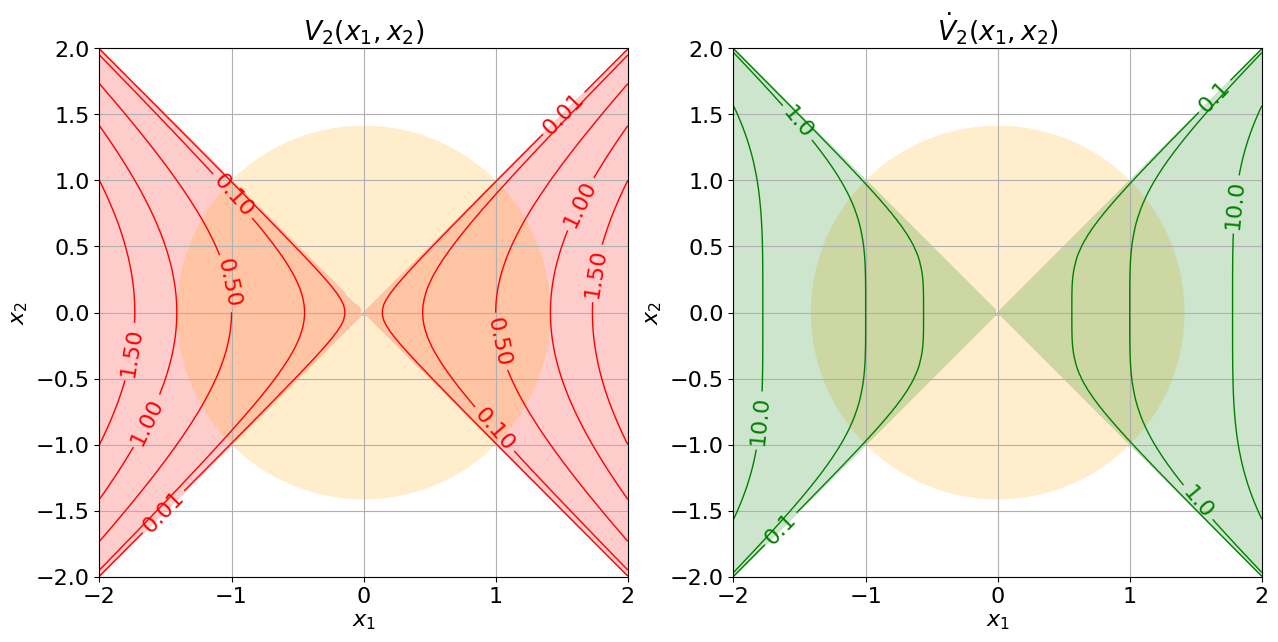

In [6]:
plt.figure(figsize=(15, 7))

# Darstellung der Verhältnisse für V2
plt.subplot(121)

# Niveaulinien von V_2
cntr = plt.contour(xx1, xx2, V2, levels=[0.01, 0.1, 0.5, 1.0, 1.5, 2], colors="red", linewidths=1)
plt.gca().clabel(cntr, inline="True")

# Bereich, in dem V_2 positiv
plt.contourf(xx1, xx2, V2, levels=[0, 10], colors="red", alpha=0.2)

# Kreis für B_r
plt.gca().add_artist(plt.Circle(( 0, 0), np.sqrt(2), facecolor="orange", alpha=0.2))

# Hübsch machen
plt.gca().set_aspect(1)
plt.grid()
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('$V_2(x_1, x_2)$')


# Darstellung der Verhältnisse für \dot V2
plt.subplot(122)

# Kreis für B_r
plt.gca().add_artist(plt.Circle(( 0, 0), np.sqrt(2), facecolor="orange", alpha=0.2))

# Bereich, in dem \dot V_2 positiv
plt.contourf(xx1, xx2, V2Dot, levels=[0, 100], colors="green", alpha=0.2)
cntr = plt.contour(xx1, xx2, V2Dot, levels=[0.1, 1, 10], colors="green", linewidths=1)
plt.gca().clabel(cntr, inline="True")

# Hübsch machen
plt.gca().set_aspect(1)
plt.grid()
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('$\dot V_2(x_1, x_2)$')

In diesem Beispiel fallen die Bereiche, in denen sowohl $V_2$ als auch $\dot V_2$ positiv sind, zusammen.

- Die Menge, in der $V_2 > 0$, ist rot hinterlegt, die Kontourlinien sind rot, siehe linke Abbildung. Es gibt beliebig kleine $x_0$ für die $V_2 > 0$.
- Die Menge, in der $\dot V_2 > 0$, ist grün hinterlegt, die Kontourlinien sind grün, siehe rechte Abbildung
- Die Menge $B_r$ ist jeweils durch den gelben Kreis markiert (Radius willkürlich zu $\sqrt{2}$ gewählt)
- Die Menge $U$ ist die Schnittmenge aus der roten und der gelben. Sie ist gleich der Schnittmenge aus der grünen und der gelben: Auf $U$ ist $\dot V$ damit auch positiv. Also ist die Ruhelage instabil.